# Importation de bibliothèques

In [1]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.feature_selection import chi2
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif

# Chargement des données

In [2]:
arcene_train = pd.read_csv("./data/ARCENE/arcene_train.data", sep=" ", header=None).drop([10000], axis=1)
arcene_train_labels = pd.read_csv("./data/ARCENE/arcene_train.labels", sep=" ", header=None)
arcene_valid = pd.read_csv("./data/ARCENE/arcene_valid.data", sep=" ", header=None).drop([10000], axis=1)
arcene_valid_labels = pd.read_csv("./data/arcene_valid.labels", sep=" ", header=None)
arcene_test = pd.read_csv("./data/ARCENE/arcene_test.data", sep=" ", header=None).drop([10000], axis=1)

# Impression des données

In [3]:
data_train = arcene_train.copy()

print(data_train)

    0     1     2     3     4     5     6     7     8     9     ...  9990  \
0      0    71     0    95     0   538   404    20     0     0  ...   255   
1      0    41    82   165    60   554   379     0    71     0  ...   213   
2      0     0     1    40     0   451   402     0     0     0  ...   235   
3      0    56    44   275    14   511   470     0     0     0  ...    91   
4    105     0   141   348     0   268   329     0     0     1  ...   813   
..   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
95    24    26     0   461     0   545     0    17   159   177  ...   275   
96    40     0     0   419    71   502     0    39    93   163  ...   277   
97     2    15    48   677     0   434   442     0    43     0  ...   211   
98     8     0    38   205    69   419   454     0   113     3  ...   193   
99     0     0     0   148     0   583     0     6   130   112  ...   271   

    9991  9992  9993  9994  9995  9996  9997  9998  9999  
0    570    86  

In [4]:
arcene_valid_labels = arcene_valid_labels.replace({1: True, -1: False})

arcene_train_labels = arcene_train_labels.replace({1: True, -1: False})

print(arcene_train_labels)

        0
0    True
1   False
2    True
3    True
4   False
..    ...
95  False
96  False
97   True
98  False
99   True

[100 rows x 1 columns]


In [5]:
# arcene_train_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)
# 
# arcene_valid_concatinated = pd.concat([arcene_valid, arcene_valid_labels], axis=1, ignore_index=True)

# Concaténation des données d'apprentissage et des étiquettes

In [6]:
arcene_train_concatinated = pd.concat([arcene_train, arcene_train_labels], axis=1, ignore_index=True)
arcene_valid_concatinated = pd.concat([arcene_valid, arcene_valid_labels], axis=1, ignore_index=True)

print(arcene_train_concatinated)

    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...   

    9991   9992   9993   99

# Vérifier si l'ensemble de données est équilibré

       0  count
0  False     56
1   True     44


<Axes: xlabel='0', ylabel='count'>

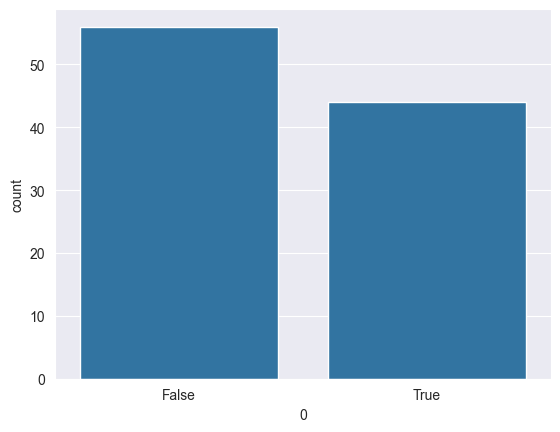

In [7]:
xx = arcene_train_labels[0].value_counts().reset_index()
print(xx)
sns.barplot(x=0, y='count', data=xx)

# Selection des features (caracteristiques)
Due que nous avons 10000 features avec des features aleatoires pour perturber le dataset et les algorithms, nous allons selectionner les features les plus importantes pour notre dataset.

Nous allons utiliser deux methodes pour selectionner les features les plus importants :
- La variance
- K-best features

Pour apres tester les deux methodes et voir la quelle est la plus efficace avec nos algorithms.

Commencons par la variance :

### Variance

La variance est une mesure de la dispersion des données. Elle est calculée comme la moyenne des carrés des écarts à la moyenne. Plus la variance est élevée, plus les données sont dispersées. Une variance nulle signifie que toutes les valeurs sont identiques.

On va calculer la variance de chaque feature, et on va selectionner les features avec les plus grandes variances.

Calcul de la variance de chaque feature:

In [8]:
features_var = arcene_train.var(axis = 0)

print(features_var)

0        2476.420606
1        1420.607172
2        4711.464646
3       26982.828687
4         694.220101
            ...     
9995    21135.563131
9996    12796.613636
9997        4.454949
9998    12033.786970
9999    11247.744949
Length: 10000, dtype: float64


In [9]:
scaler = MinMaxScaler()
scaled_arcene_train = scaler.fit_transform(arcene_train)

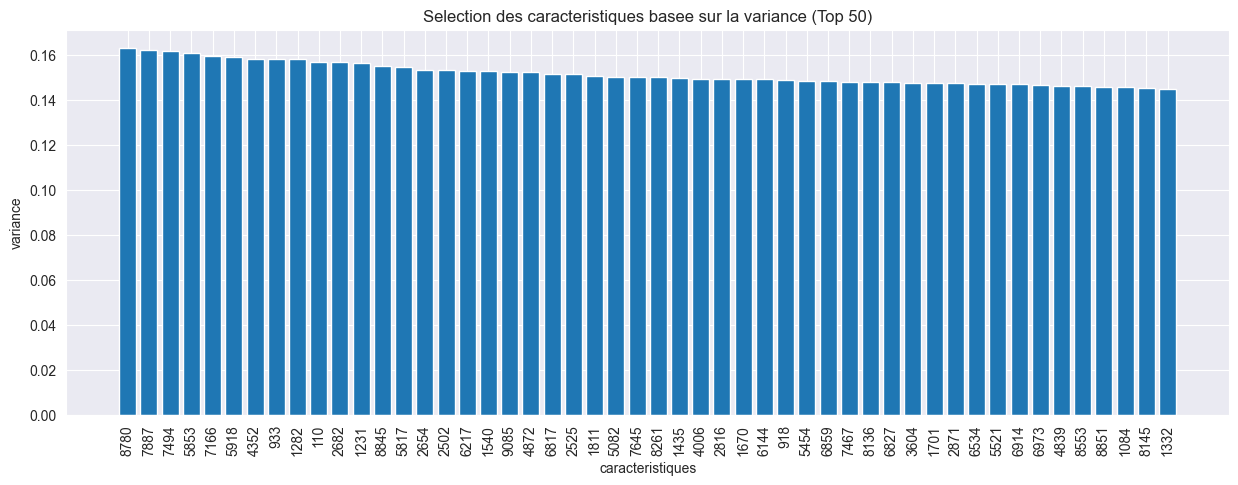

In [10]:
variances = scaled_arcene_train.var(axis=0)
sorted_indices = np.argsort(variances)[::-1]

# Plot the top 50 features based on variance
top_features = 50
plt.figure(figsize=(15, 5))
plt.bar(x=range(top_features), height=variances[sorted_indices][:top_features])
plt.xticks(ticks=range(top_features), labels=arcene_train.columns[sorted_indices][:top_features], rotation=90)
plt.xlabel('caracteristiques')
plt.ylabel('variance')
plt.title('Selection des caracteristiques basee sur la variance (Top 50)')
plt.show()
#les 50 features avec les plus grandes variances

Trouver la variance maximale et minimale et leur moyenne

In [11]:
max_variance = np.max(variances)
min_variance = np.min(variances)
mean_variance = np.mean(variances)

print("Variance moyenne :", mean_variance)
print("Variance maximale :", max_variance)
print("Variance minimale :", min_variance)

Variance moyenne : 0.05216673046897827
Variance maximale : 0.16295643045314845
Variance minimale : 0.0


On va eliminer toute les colonnes avec ces varainces, en choisisant un seuil

In [12]:
# exemple :
threshold = mean_variance # le seuil

selector = VarianceThreshold(threshold=threshold)
x_high_variance = selector.fit_transform(scaled_arcene_train)
high_variance_indices = np.where(selector.variances_ >= threshold)[0]


#suppriner
arcene_train_filtered_with_var = arcene_train_concatinated[high_variance_indices]
arcene_valid_filtered_with_var = arcene_valid_concatinated[high_variance_indices]


#afficher les caracteristiques selectionnes :
print("Nombre de caractéristiques avant la sélection :", arcene_train.shape[1])
print("Nombre de caractéristiques après la sélection :",  arcene_train_filtered_with_var.shape[1])

arcene_train_filtered_with_var_concatinated = pd.concat([arcene_train_filtered_with_var, arcene_train_labels], axis=1, ignore_index=True)

Nombre de caractéristiques avant la sélection : 10000
Nombre de caractéristiques après la sélection : 4406


### K-best features

La méthode K-best est une méthode de sélection de caractéristiques univariée. Elle calcule la corrélation entre chaque caractéristique et la variable cible, puis sélectionne les caractéristiques qui ont la plus forte corrélation avec la variable cible.

Nous allons utiliser la méthode K-best pour sélectionner les 120 meilleures caractéristiques.

Avant faire ceci, le dataset contient des colonnes avec des valeurs constantes, donc on doit les supprimer.

Cette methode est utilisee pour trouver les colonnes non constantes :

In [13]:
def get_non_constant_columns(dataframe):
    return [col for col in dataframe.columns if len(dataframe[col].unique()) > 1]

Pour qu'on apres les laisser dans le dataset.

In [14]:
arcene_train_with_kbfeat = arcene_train.copy()

arcene_valid_with_kbfeat = arcene_valid.copy()

arcene_test_with_kbfeat = arcene_test.copy()

keep_columns = get_non_constant_columns(arcene_train_with_kbfeat)

arcene_train_with_kbfeat = arcene_train_with_kbfeat[keep_columns]

arcene_valid_with_kbfeat = arcene_valid_with_kbfeat[keep_columns]

arcene_test_with_kbfeat = arcene_test_with_kbfeat[keep_columns]

Maintenant on peut utiliser la methode K-best pour selectionner les 120 meilleures caracteristiques.

On va utiliser la fonction f_classif pour calculer la corrélation entre chaque caractéristique et la variable cible.

In [15]:
skb = SelectKBest(score_func=f_classif,  # Set f_classif as our criteria to select features
                  k=120)  # Select top two features based on the criteria

# Train and transform the dataset according to the SelectKBest
arcene_train_with_kbfeat_filtered = skb.fit_transform(arcene_train_with_kbfeat, arcene_train_labels)

# Print the results
print('Number of features before feature selection: {}'.format(arcene_train_with_kbfeat.shape[1]))
print('Number of features after feature selection: {}'.format(arcene_train_with_kbfeat_filtered.shape[1]))
print('Features selected: {}'.format(skb.get_support(indices=True)))

Number of features before feature selection: 9920
Number of features after feature selection: 120
Features selected: [   4    9   65   85  108  289  306  370  381  408  429  459  461  479
  530  686  770  789  846  860  901  970 1135 1171 1463 1707 1732 1734
 1773 1835 1869 1959 2117 2207 2289 2618 2676 2792 2840 3232 3336 3341
 3527 3573 3584 3660 3693 3787 3952 4036 4087 4149 4253 4481 4518 4587
 4743 4833 4914 4927 4959 4994 5136 5423 5704 5756 5853 5989 6070 6148
 6423 6443 6528 6625 6642 6707 6716 6869 6972 7032 7039 7101 7134 7156
 7365 7406 7476 7562 7585 7589 7635 7651 7668 7682 7790 7846 7854 7909
 7926 8080 8196 8275 8290 8297 8340 8390 8411 8431 8514 8712 8729 8733
 8757 8951 9202 9506 9538 9571 9580 9664]


D:\FST\MST - AIDS\S1\ML\PROJECTS\DEVOIR2\venv\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
arcene_train_with_kbfeat_filtered = pd.DataFrame(arcene_train_with_kbfeat_filtered)

arcene_train_with_kbfeat_filtered_concatinated = pd.concat([arcene_train_with_kbfeat_filtered, arcene_train_labels], axis=1, ignore_index=True)

print(arcene_train_with_kbfeat_filtered_concatinated)

    0    1    2    3    4    5    6    7    8    9    ...  111  112  113  114  \
0     0    0    0    0    0  466    3    0    0    6  ...    0    0    5  450   
1    60    0    9    0    0  395   92   85    0   83  ...    0   66   75  337   
2     0    0    0    0    0  483   19    2    0   21  ...    0    0   20  399   
3    14    0    0    0    0  439   56   42    0   55  ...    0   45   52  476   
4     0    1    0   38    0  342   44   19    0   49  ...   28  111   48  292   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95    0  177  164    0  200    0  183  152  203  194  ...    0    7  198   94   
96   71  163  159   43  136    0  190  171  136  195  ...   38   67  197   68   
97    0    0    0   15    0  467    0    4    0    2  ...   25    0    3  469   
98   69    3   19   14    0  420   12   26    0   10  ...   25   41    9  432   
99    0  112  100    0  174    0  111   94  177  117  ...    0    7  120  282   

    115  116  117  118  119

In [17]:
arcene_valid_with_kbfeat_filtered = skb.transform(arcene_valid_with_kbfeat)

arcene_valid_with_kbfeat_filtered = pd.DataFrame(arcene_valid_with_kbfeat_filtered)

arcene_valid_with_kbfeat_filtered_concatinated = pd.concat([arcene_valid_with_kbfeat_filtered, arcene_valid_labels], axis=1, ignore_index=True)

print(arcene_valid_with_kbfeat_filtered_concatinated)

    0    1    2    3    4    5    6    7    8    9    ...  111  112  113  114  \
0     2    0    0    1    0  410   21   40    0   14  ...    9    7   11  392   
1     0  222  202    0  145    0  195  160  151  213  ...    0   17  222  169   
2    53  147  133   39  143    0  137  106  142  145  ...   34   61  148   31   
3     0    0    4    0    0  437   15   24    0   11  ...    0   42    9  453   
4     2    0    0    0    0  470   21   24    0   16  ...    0    3   13  431   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
95   92  261  254   86  297    0  274  254  298  282  ...   77  102  287  101   
96  109  134  121   69  148  145  193  170  150  203  ...   68   91  206  130   
97    0    0    0   15    0  263   17    0    0   20  ...    5   87   19  308   
98    0    4    9    0    9  388   83   75    8   80  ...    0    0   78  323   
99    0    0    1   46    0  277   55   25    0   55  ...   39  143   53  366   

    115  116  117  118  119

In [18]:
arcene_test_with_kbfeat_filtered = skb.transform(arcene_test_with_kbfeat)

arcene_test_with_kbfeat_filtered = pd.DataFrame(arcene_test_with_kbfeat_filtered)

print(arcene_test_with_kbfeat_filtered)

     0    1    2    3    4    5    6    7    8    9    ...  110  111  112  \
0      0   16   15   16    7  203   56   38    7   51  ...    9   15   92   
1     69  141  139   66  129    0  140  131  130  145  ...   71   63   86   
2      0  180  160    4  263  241  216  183  276  233  ...    0    5   10   
3      0    0    0    0    0  500   69   72    0   56  ...    0    0    7   
4     84  112  101   78  135  156  133  117  139  143  ...   59   74   86   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
695   55  144  133    0  174    0  136  115  175  143  ...    0    0   10   
696   30  127  121   46  137   57  119  101  138  128  ...   38   45   54   
697   18  214  190   44  218    0  206  166  222  220  ...   62   41   73   
698   38   30   34   28   57  477   27   19   69   33  ...    8   35   57   
699   18  215  193   64  243    0  182  140  247  197  ...   79   60   84   

     113  114  115  116  117  118  119  
0     47  332    0   45    5    0 

# Prétraitement des données

### Suppression des lignes dupliquées et des lignes avec des valeurs manquantes

In [19]:
missing_values = False
duplicates = False

if arcene_train_concatinated.isna().values.any():
    missing_values = True
    arcene_train_concatinated.dropna(inpLace=True)

if arcene_train_concatinated.duplicated().any():
    duplicates = True
    arcene_train_concatinated.drop_duplicates(inpLace=True)
    
# Resume
print("Missing values detected: ", missing_values)
print("Duplicate rows detected: ", duplicates)

print(arcene_train_concatinated)

Missing values detected:  False
Duplicate rows detected:  False
    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583 

### Visualisation exemplaire d'un diagramme de dispersion

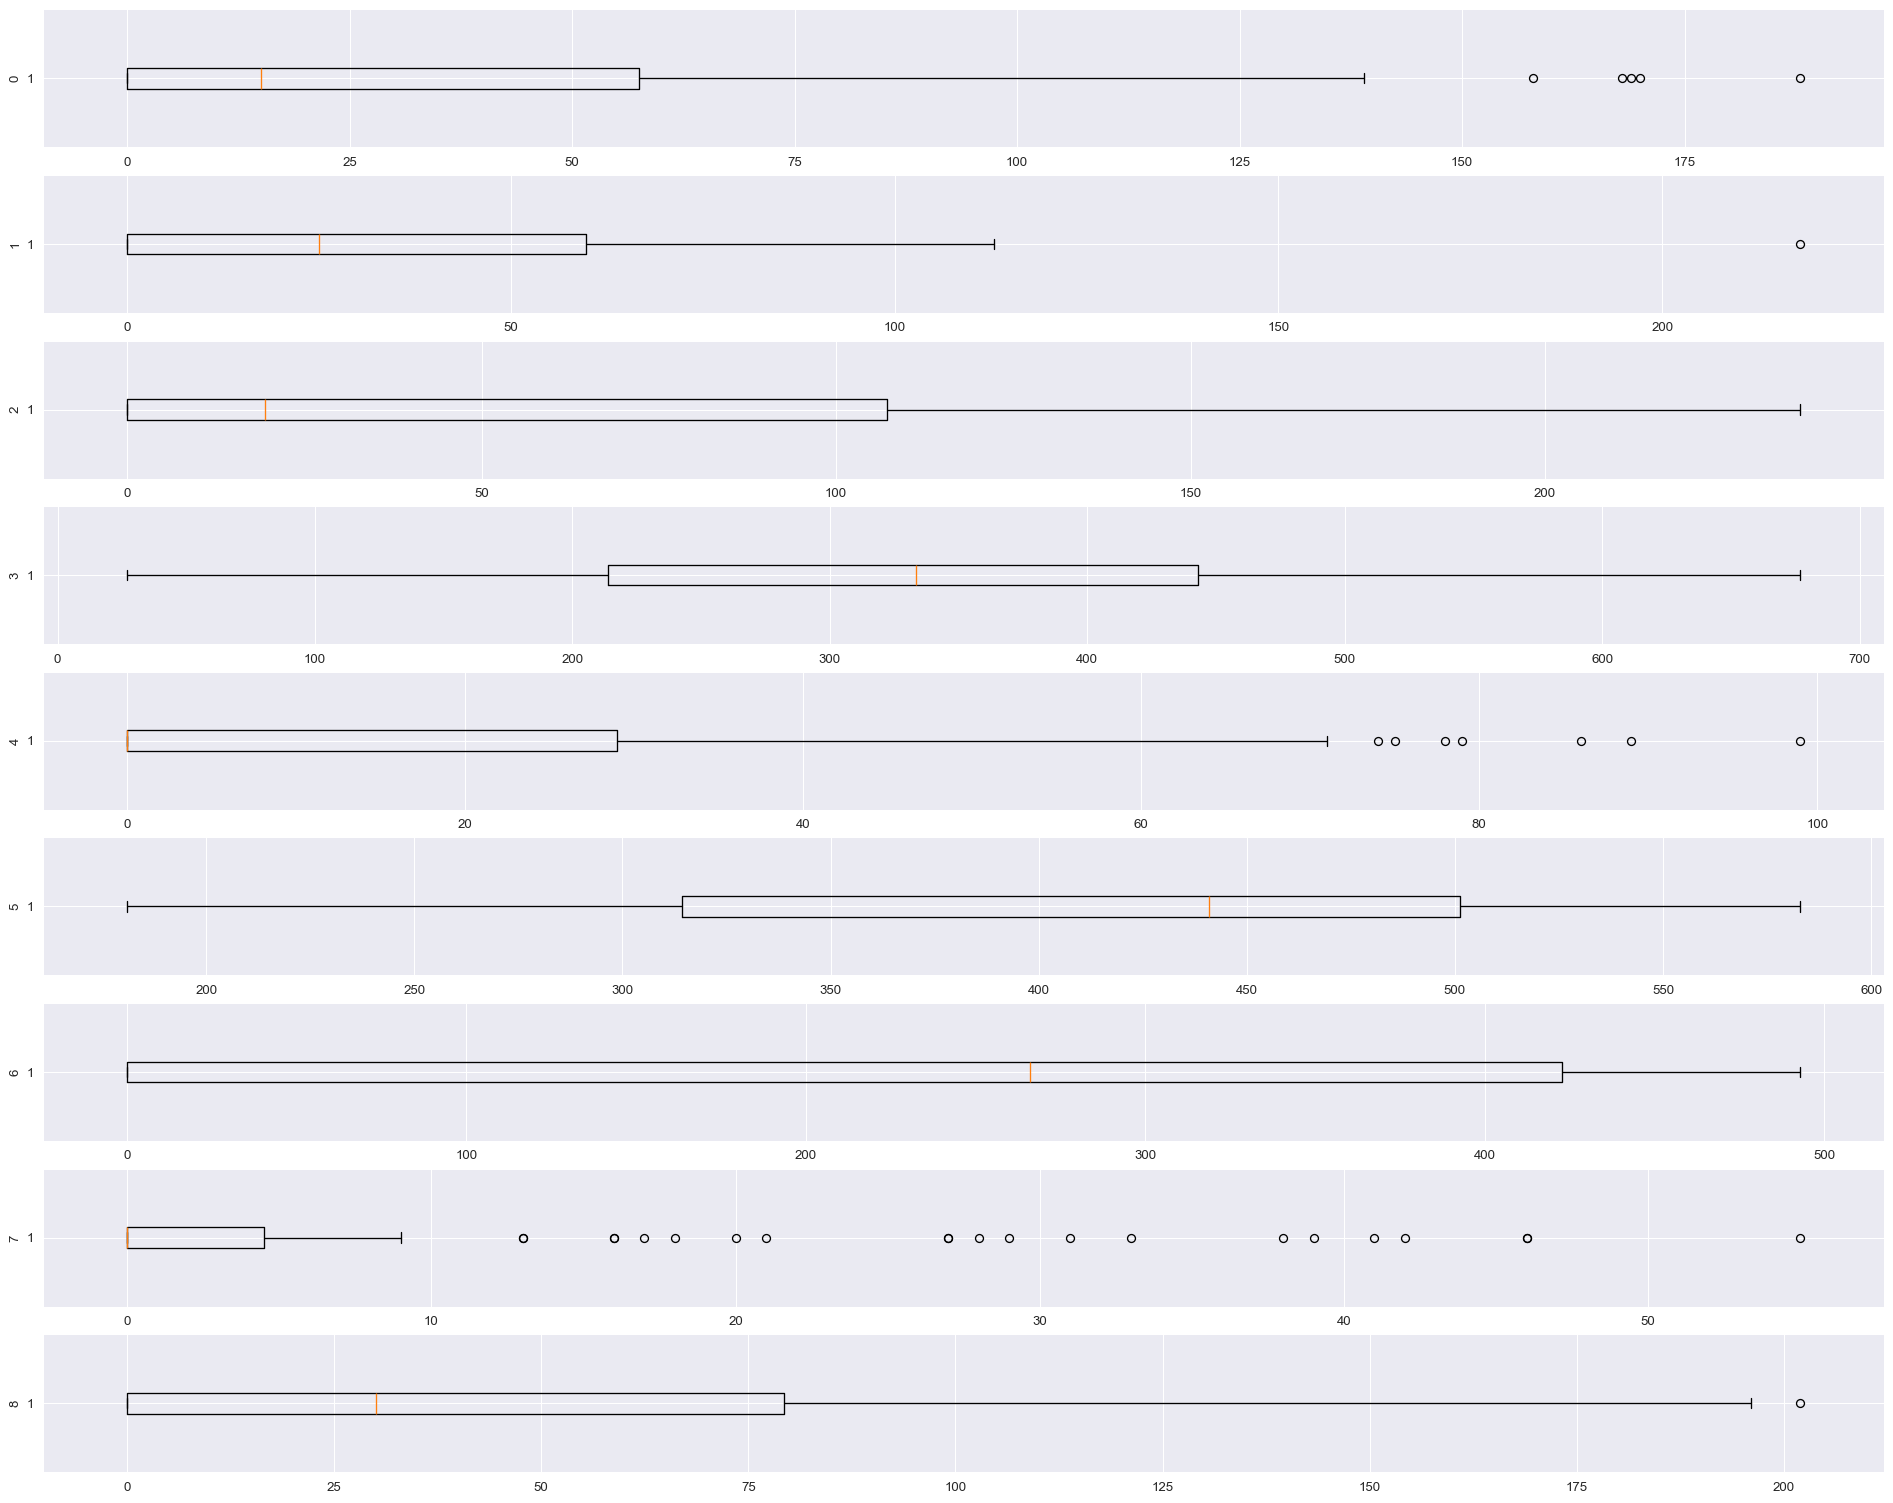

In [20]:
fig, axs = plt.subplots(9,1,dpi=95, figsize=(25,20))
i = 0
for col in range(9):
    axs[i].boxplot(arcene_train_concatinated[col], vert=False)
    axs[i].set_ylabel(col)
    i+=1
plt.show()

### Suppression des valeurs extrêmes (valeurs aberrantes)
##### Il existe de nombreuses techniques pour supprimer les valeurs aberrantes. Nous allons essayer l'approche basée sur le Z-score et le percentile.

##### Approche du score Z :

In [21]:
processed_arcene_train_zscore = arcene_train_concatinated.copy()

for col in arcene_train_concatinated.columns:
    processed_arcene_train_zscore[np.abs(stats.zscore(processed_arcene_train_zscore[col])) < 3]
    
# Resume
print("Number of outliers detected: ", 100 - processed_arcene_train_zscore.shape[0])

print(processed_arcene_train_zscore)

Number of outliers detected:  0
    0      1      2      3      4      5      6      7      8      9      ...  \
0       0     71      0     95      0    538    404     20      0      0  ...   
1       0     41     82    165     60    554    379      0     71      0  ...   
2       0      0      1     40      0    451    402      0      0      0  ...   
3       0     56     44    275     14    511    470      0      0      0  ...   
4     105      0    141    348      0    268    329      0      0      1  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95     24     26      0    461      0    545      0     17    159    177  ...   
96     40      0      0    419     71    502      0     39     93    163  ...   
97      2     15     48    677      0    434    442      0     43      0  ...   
98      8      0     38    205     69    419    454      0    113      3  ...   
99      0      0      0    148      0    583      0      6    130    112  ...

##### Approche basée sur les percentiles :

Exemple de calcul des percentiles et de l'intervalle interquartile (IQR) pour une colonne

In [22]:
q1, q3 = np.percentile(arcene_train_concatinated[0], [25, 75], method='midpoint')
iqr = q3 - q1
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

print(q1, q3, iqr, upper_bound, lower_bound)

0.0 58.0 58.0 145.0 -87.0


Suppression des valeurs aberrantes pour toutes les colonnes avec la méthode des percentiles:

In [23]:
# processed_arcene_train_per = arcene_train_concatinated.copy()
# 
# for col in processed_arcene_train_per.columns[0:10000]:
#     print(processed_arcene_train_per.shape)
#     if processed_arcene_train_per.shape[0] != 0:
#         q1, q3 = np.percentile(processed_arcene_train_per[col], [25, 75], method='midpoint')
#         iqr = q3 - q1
#         upper_bound = q3 + (1.5 * iqr)
#         lower_bound = q1 - (1.5 * iqr)
#     
#         # # Create arrays of Boolean values indicating the outlier rows
#         # upper_array = np.where(processed_arcene_train_per[col] >= upper_bound)[0]
#         # lower_array = np.where(processed_arcene_train_per[col] <= lower_bound)[0]
#         # 
#         # # Removing the outliers
#         # for i, j in zip(upper_array, lower_array):
#         #     if i in processed_arcene_train_per.index:
#         #         processed_arcene_train_per.drop(index=upper_array, inplace=True)
#         #     if j in processed_arcene_train_per.index:
#         #         processed_arcene_train_per.drop(index=lower_array, inplace=True)
#         
#         processed_arcene_train_per = processed_arcene_train_per[((processed_arcene_train_per > lower_bound) & (processed_arcene_train_per < upper_bound)).any(axis=1)]
# 
# # Resume
# print("Number of outliers detected: ", 100 - processed_arcene_train_per.shape[0])
# 
# print(processed_arcene_train_per)

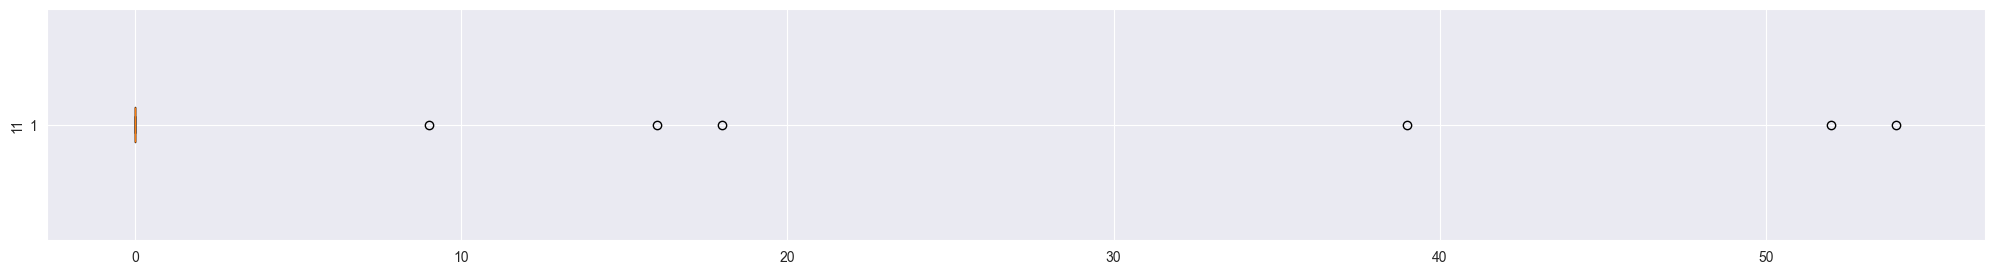

In [24]:
fig, axs = plt.subplots(dpi=100, figsize=(25,3))
axs.boxplot(arcene_train_concatinated[11], vert=False)
axs.set_ylabel(11)
plt.show()

A la 11eme iterration, nous avons supprimé toutes les lignes de l'ensemble de données, puisque l'algorithme trouve que toutes les valeurs sont aberrantes, comme on voit dans le diagramme de dispersion ci-dessus.

Mais il y a un problème avec cette approche. à un moment donné, nous supprimons trop de lignes et nous nous retrouvons avec un ensemble de données vide. (Precisement lors du traitement de la colonne 11). Donc on doit modifier l'approche pour saute les colonnes ou toutes les valeurs sont aberrantes, ou ne pas utiilies la méthode des percentiles.